## **Use Long Short-Term Memory (LSTM) for stock price prediction. Analyze apple company's stock data to forecast future prices effectively.**

# **Author: AHMED REKIK.**

### THE DATA SCIENCE INTERNSHIP.

In [ ]:
#install the prerequiments
!pip install yfinance

# **Import the libraries**

In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# **Processing the Data**

In [ ]:
stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.009068,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.407410,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.949337,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,21.980764,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.096998,283192000


In [ ]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1.447000e+03
mean,62.548246,63.213274,61.897859,62.583359,60.639281,1.280990e+08
std,37.286174,37.721778,36.792048,37.265635,37.330035,5.997313e+07
min,22.500000,22.917500,22.367500,22.584999,20.826063,4.544800e+07
25%,36.879999,37.172501,36.490000,36.962500,34.898375,8.815295e+07
50%,47.252499,47.669998,46.882500,47.209999,45.402885,1.115985e+08
75%,79.118748,79.884998,78.435001,79.331249,77.554703,1.487286e+08
max,156.979996,157.259995,154.389999,156.690002,154.897964,5.334788e+08


In [ ]:
stock_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# **Visualisation**

Text(0, 0.5, 'Prices ($)')

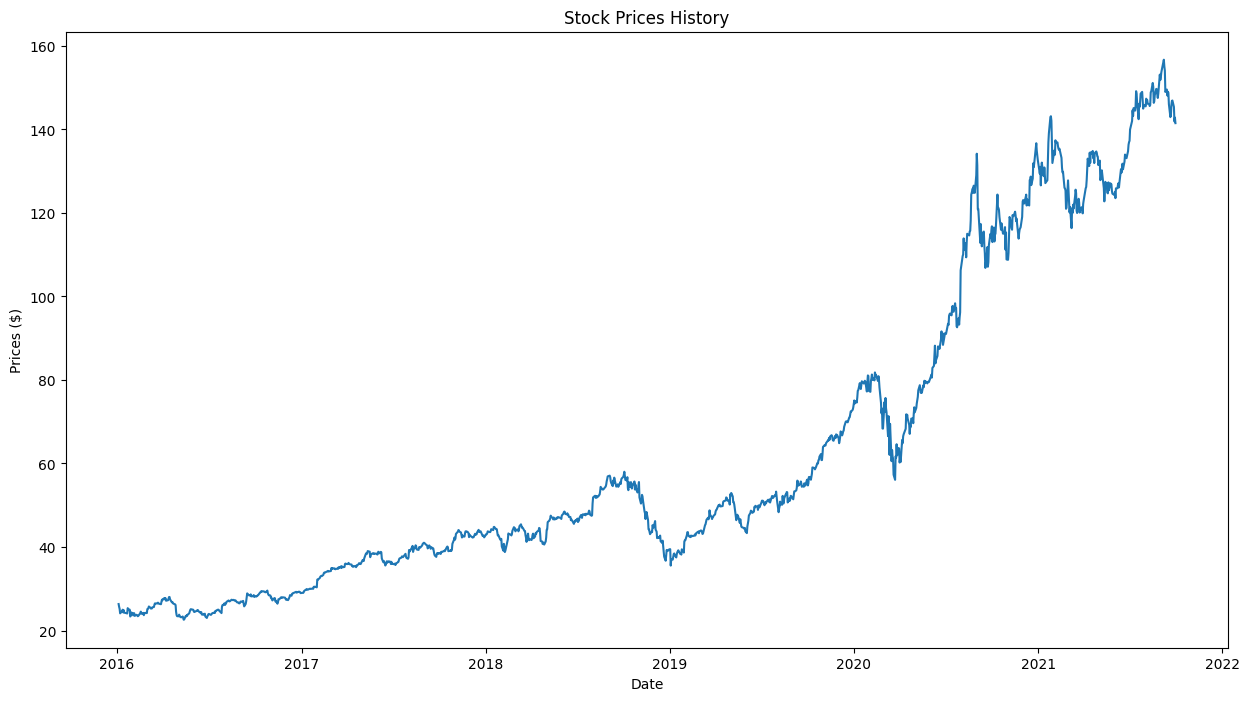

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

# **Splitting Data**

In [ ]:
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print("*******")
print(y_train)

[[[0.02798181]
  [0.02306029]
  [0.01931323]
  ...
  [0.02768354]
  [0.03232542]
  [0.03583013]]

 [[0.02306029]
  [0.01931323]
  [0.01139033]
  ...
  [0.03232542]
  [0.03583013]
  [0.03476753]]

 [[0.01931323]
  [0.01139033]
  [0.01234108]
  ...
  [0.03583013]
  [0.03476753]
  [0.03663175]]

 ...

 [[0.41883227]
  [0.4121211 ]
  [0.40511165]
  ...
  [0.62395139]
  [0.64391707]
  [0.64934193]]

 [[0.4121211 ]
  [0.40511165]
  [0.40863504]
  ...
  [0.64391707]
  [0.64934193]
  [0.65230602]]

 [[0.40511165]
  [0.40863504]
  [0.4052235 ]
  ...
  [0.64934193]
  [0.65230602]
  [0.68094027]]]
*******
[0.03476753 0.03663175 0.03873831 ... 0.65230602 0.68094027 0.66013573]


In [ ]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test)

[[[0.40863504]
  [0.4052235 ]
  [0.41873903]
  ...
  [0.65230602]
  [0.68094027]
  [0.66013573]]

 [[0.4052235 ]
  [0.41873903]
  [0.41534621]
  ...
  [0.68094027]
  [0.66013573]
  [0.67217851]]

 [[0.41873903]
  [0.41534621]
  [0.42669924]
  ...
  [0.66013573]
  [0.67217851]
  [0.64717944]]

 ...

 [[0.87524704]
  [0.89060812]
  [0.9096231 ]
  ...
  [0.92647552]
  [0.92714661]
  [0.91558848]]

 [[0.89060812]
  [0.9096231 ]
  [0.89970548]
  ...
  [0.92714661]
  [0.91558848]
  [0.88978786]]

 [[0.9096231 ]
  [0.89970548]
  [0.91364974]
  ...
  [0.91558848]
  [0.88978786]
  [0.89664815]]]


# **Model Definition**

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


# **Training Configuration**

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=20)

Epoch 1/20
1098/1098 [==============================] - 59s 50ms/step - loss: 6.4851e-04
Epoch 2/20
1098/1098 [==============================] - 55s 50ms/step - loss: 2.8510e-04
Epoch 3/20
1098/1098 [==============================] - 55s 50ms/step - loss: 3.5768e-04
Epoch 4/20
1098/1098 [==============================] - 68s 62ms/step - loss: 2.4070e-04
Epoch 5/20
1098/1098 [==============================] - 54s 50ms/step - loss: 1.6507e-04
Epoch 6/20
1098/1098 [==============================] - 57s 51ms/step - loss: 2.7093e-04
Epoch 7/20
1098/1098 [==============================] - 54s 50ms/step - loss: 1.7414e-04
Epoch 8/20
1098/1098 [==============================] - 57s 52ms/step - loss: 1.5812e-04
Epoch 9/20
1098/1098 [==============================] - 62s 57ms/step - loss: 2.2560e-04
Epoch 10/20
1098/1098 [==============================] - 55s 50ms/step - loss: 1.5827e-04
Epoch 11/20
1098/1098 [==============================] - 55s 50ms/step - loss: 1.7366e-04
Epoch 12/20
1098/10

# **Prediction Evaluation**

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10/10 [==============================] - 2s 33ms/step


5.7677883161393

# **Prediction visualisation**

<ipython-input-23-d92c50f720f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


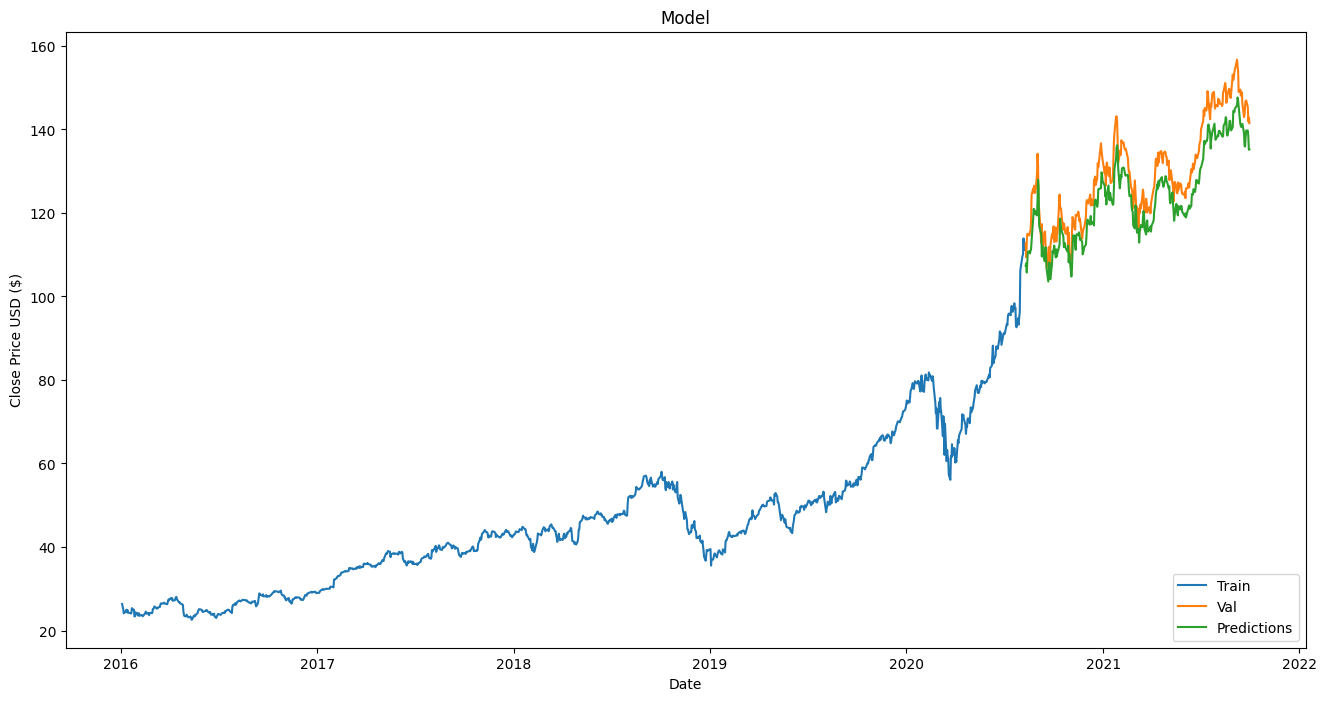

In [ ]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# **THANKS.**